In [ ]:
!pip install transformers


#Pipieline
1. API
2. Using pre-trained models
3. the complexity of loading models, tokenizers, and processing inputs
4. perform tasks like text generation, text classification, named entity recognition, question answering etc

In [ ]:
from transformers import pipeline

#Creating a pipeline for sentiment analysis
1. By default it uses "distilbert-base-uncased-finetuned-sst-2-english" model
2. This model is fine-tuned for sentiment analysis
3. This loads the tokenizer

In [ ]:
classifier=pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

#Output
a list of dictionaries containing the sentiment label and a confidence score.

In [ ]:
res=classifier('i am good but feeling tired')
print(res)

[{'label': 'POSITIVE', 'score': 0.9858076572418213}]


In [ ]:
classifier=pipeline(task='text-generation')
res=classifier('i am good but feeling tired so i can')
print(res)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "i am good but feeling tired so i can't do a thing right now anyway.\n\nThe first step is to start your new server and try to move the team down. I went in first by myself and that took me about 10 minutes because"}]


In [ ]:
classifier=pipeline(task='text-generation')
res=classifier('Twinkle, twinkle, little star, How I wonder what you are!Up above the ')
print(res)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Twinkle, twinkle, little star, How I wonder what you are!Up above the urn of a bird, below the sky I see light."A white sky as if there would suddenly appear a shadow through the air, above-by'}]


You can use **any model** by specifying in the pipeline using model argument.

In [ ]:
classifier1 = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

#The model gives output in the form of labels and score.
The label is in the range 1-5 stars, showing negative to positive. 3 being neutral.

In [ ]:
# Tamil sentence example
tamil_sentence = "நான் இந்த நூலை மிகவும் விரும்புகிறேன்"  # Translation: "I really like this book."
# Perform sentiment analysis
result = classifier1(tamil_sentence)
print(result)


[{'label': '5 stars', 'score': 0.7272273898124695}]


In [ ]:
kannada_sentence = "ನಿಮ್ಮಲ್ಲಿ ಸಾಮಾನ್ಯ ಬುದ್ಧಿವಂತಿಕೆ ಇಲ್ಲವೇ?"
result1 = classifier1(kannada_sentence)
print(result1)

[{'label': '1 star', 'score': 0.3911985456943512}]


In [ ]:
# Hindi sentence example
hindi_sentence = "मुझे यह किताब बहुत पसंद है"  # Translation: "I really like this book."

# Perform sentiment analysis
result = classifier1(hindi_sentence)
print(result)


[{'label': '5 stars', 'score': 0.6077671051025391}]


In [ ]:
bengali_text='আমি তো এই বইটি পছন্দ করি'
result = classifier1(bengali_text)
print(result)

[{'label': '5 stars', 'score': 0.3770836889743805}]


The task can also be **changed** from sentiment analysis to any thing like **text generation**, named entity recognition, text classification, etc.

In [ ]:
generator=pipeline(task='text-generation',model='distilgpt2')
res=generator("i am good but feeling tired so i can",max_length=30,num_return_sequences=2)
print(res)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'i am good but feeling tired so i can’t believe i am still alive. But i have been having a really bad day and the team'}, {'generated_text': 'i am good but feeling tired so i can get on the bike\n\nJust had my wife in bed and there was no thing she could possibly have'}]


The **zero-shot-classification** task in Hugging Face’s transformers library allows you to classify text into categories or labels that the **model has not been specifically trained on**

In [ ]:
classifier=pipeline(task='zero-shot-classification')
res=classifier('i am good but feeling tired so i can do project in the laptop or computer can do it in apple iphone',
candidate_labels=['urgent', 'not urgent', 'phone', 'tablet', 'computer'])
print(res)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'i am good but feeling tired so i can do project in the laptop or computer can do it in apple iphone', 'labels': ['phone', 'computer', 'not urgent', 'tablet', 'urgent'], 'scores': [0.4816505014896393, 0.42279964685440063, 0.0454995296895504, 0.04068395495414734, 0.009366389364004135]}


In [ ]:
classifier=pipeline(task='zero-shot-classification')
res=classifier('I’m feeling okay but somewhat exhausted, so I can complete the project on my laptop or desktop, or possibly on my smartphone.',
candidate_labels=['urgent', 'not urgent', 'phone', 'tablet', 'computer'])
print(res)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'I’m feeling okay but somewhat exhausted, so I can complete the project on my laptop or desktop, or possibly on my smartphone.', 'labels': ['computer', 'not urgent', 'phone', 'tablet', 'urgent'], 'scores': [0.6595627665519714, 0.1717902421951294, 0.14770884811878204, 0.015054270625114441, 0.00588388042524457]}


# **Summarization Pipeline.**

In [ ]:
# use bart in pytorch
summarizer = pipeline("summarization")
summarizer("An apple a day, keeps the doctor away", min_length=5, max_length=20)

# use t5 in tf
summarizer = pipeline("summarization", model="google-t5/t5-base", tokenizer="google-t5/t5-base", framework="tf")
summarizer("An apple a day, keeps the doctor away.", min_length=5, max_length=20)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your max_length is set to 20, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Your max_length is set to 20, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


[{'summary_text': 'an apple a day, keeps the doctor away from the doctor .'}]

In [ ]:
# use bart in pytorch
summarizer = pipeline("summarization")
summarizer("The sun sets low, the moon starts to glow, as the stars begin to show.", min_length=5, max_length=11)

# use t5 in tf
summarizer = pipeline("summarization", model="google-t5/t5-base", tokenizer="google-t5/t5-base", framework="tf")
summarizer("The sun sets low, the moon starts to glow, as the stars begin to show.", min_length=5, max_length=11)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


[{'summary_text': 'the sun sets low, the moon starts to glow'}]

In [ ]:
# use bart in pytorch
summarizer = pipeline("summarization")
summarizer("Twinkle Twinkle Little Star.", min_length=2, max_length=5)

# use t5 in tf
summarizer = pipeline("summarization", model="google-t5/t5-base", tokenizer="google-t5/t5-base", framework="tf")
summarizer("Twinkle Twinkle Little Star.", min_length=2, max_length=5)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


[{'summary_text': 'Little Star.'}]

# **Question Answering Pipeline**

In [ ]:
from transformers import pipeline

oracle = pipeline(model="deepset/roberta-base-squad2")
oracle(question="Where do I live?", context="My name is Wolfgang and I live in Berlin")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

{'score': 0.9190713167190552, 'start': 34, 'end': 40, 'answer': 'Berlin'}

In [ ]:
from transformers import pipeline

oracle = pipeline(model="deepset/roberta-base-squad2")
oracle(question="At what temperature does water boil?", context="Water boils at 100 degrees Celsius under standard atmospheric pressure.")

{'score': 0.7649415731430054,
 'start': 15,
 'end': 34,
 'answer': '100 degrees Celsius'}

In [ ]:
from transformers import pipeline

oracle = pipeline(model="deepset/roberta-base-squad2")
oracle(question="What does Naruto Uzumaki aspire to become?", context="In 'Naruto', a young ninja named Naruto Uzumaki dreams of becoming the strongest ninja and the leader of his village, known as the Hokage.")

{'score': 0.26777464151382446,
 'start': 67,
 'end': 137,
 'answer': 'the strongest ninja and the leader of his village, known as the Hokage'}

# **Image to Image**

In [ ]:
from PIL import Image
import requests

from transformers import pipeline

upscaler = pipeline("image-to-image", model="caidas/swin2SR-classical-sr-x2-64")
img = Image.open(requests.get("https://img.freepik.com/free-photo/mythical-dragon-beast-anime-style_23-2151112835.jpg", stream=True).raw)
img = img.resize((64, 64))
upscaled_img = upscaler(img)
img.size

upscaled_img.size

(144, 144)

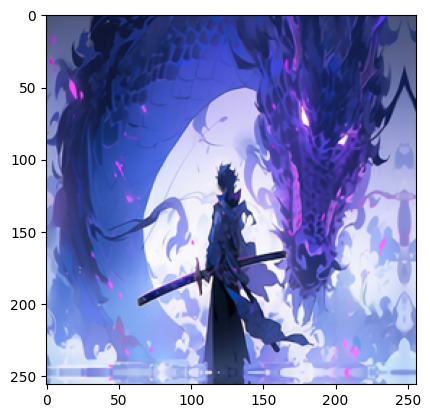

In [ ]:
from PIL import Image
import requests
from transformers import pipeline
import matplotlib.pyplot as plt

# Load and resize the image
img = Image.open(requests.get("https://img.freepik.com/free-photo/mythical-dragon-beast-anime-style_23-2151112835.jpg", stream=True).raw)

img = img.resize((124, 124))
# Upscale the image
upscaler = pipeline("image-to-image", model="caidas/swin2SR-classical-sr-x2-64")
upscaled_img = upscaler(img)

# Display the upscaled image
plt.imshow(upscaled_img)
plt.axis('on')  # Hide axes
plt.show()

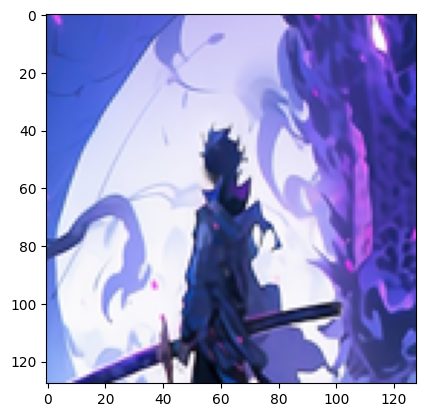

In [ ]:
width, height = upscaled_img.size
left = width // 4
upper = height // 4
right = left + (width // 2)
lower = upper + (height // 2)

# Crop the image
cropped_img = upscaled_img.crop((left, upper, right, lower))

# Display the cropped image
plt.imshow(cropped_img)
plt.axis('on')  # Show axes
plt.show()


# **Text to audio**

In [ ]:
from transformers import pipeline

pipe = pipeline(model="suno/bark-small")
output = pipe("Hey it's HuggingFace on the phone!")

audio = output["audio"]
sampling_rate = output["sampling_rate"]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
from transformers import pipeline

music_generator = pipeline(task="text-to-audio", model="facebook/musicgen-small", framework="pt")

# diversify the music generation by adding randomness with a high temperature and set a maximum music length
generate_kwargs = {
    "do_sample": True,
    "temperature": 0.7,
    "max_new_tokens": 35,
}

outputs = music_generator("Techno music with high melodic riffs", generate_kwargs=generate_kwargs)

config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

`torch.nn.functional.scaled_dot_product_attention` does not support having an empty attention mask. Falling back to the manual attention implementation. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.Note that this probably happens because `guidance_scale>1` or because you used `get_unconditional_inputs`. See https://github.com/huggingface/transformers/issues/31189 for more information.
